# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


![](https://th.bing.com/th/id/R.caa2380aad283d8587d00f0414f8f5ae?rik=wzPbj3b2%2bJlFKA&riu=http%3a%2f%2fs29322.pcdn.co%2fwp-content%2fuploads%2f2019%2f06%2fChoosingAnInstantApprovalCreditCard-700x400.jpg.optimal.jpg&ehk=zll4LXCoJvEhJhvoCIk6%2fb2hPzsSriLCohpXwj3m96k%3d&risl=&pid=ImgRaw&r=0)

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# data modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate
import joblib

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>We have two files 
<br><b>1. cc_approvals.data</b> :-  I read by read_csv <br>  
<br><b>2 .Columns_titles</b> :- I read by read_table<br>
<br></p>

In [2]:
df=pd.read_csv(r'../input/cc-approvals/cc_approvals.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
columns=pd.read_table(r'../input/d/omarmohamedyehia/cc-approvals/Columns.txt',delimiter=" ",header=None)
columns

,0
0,Gender
1,Age
2,Debt\t
3,Married\t
4,BankCustomer\t
5,EducationLevel\t
6,Ethnicity\t
7,YearsEmployed\t
8,PriorDefault\t
9,Employed\t


In [4]:
# set column index
columns.set_axis(['labels'],axis=1,inplace=True)
columns['labels'].unique()

array(['Gender', 'Age', 'Debt\t', 'Married\t', 'BankCustomer\t',
       'EducationLevel\t', 'Ethnicity\t', 'YearsEmployed\t',
       'PriorDefault\t', 'Employed\t', 'CreditScore\t',
       'DriversLicense\t', 'Citizen\t', 'ZipCode\t', 'Income\t',
       'Approved'], dtype=object)

In [5]:
# set index columns for dataframe
labels=list(columns['labels'].unique())
df.set_axis(labels,axis=1,inplace=True)
df.head()

,Gender,Age,Debt\t,Married\t,BankCustomer\t,EducationLevel\t,Ethnicity\t,YearsEmployed\t,PriorDefault\t,Employed\t,CreditScore\t,DriversLicense\t,Citizen\t,ZipCode\t,Income\t,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
# rename dataframe columns
df.columns=['gender', 'age', 'debt', 'married', 'bank_customer','education_level', 'ethnicity', 
            'years_employed', 'prior_default','employed', 'credit_score', 'driver_license', 'citizen',
            'zip_code', 'income', 'approved']

In [7]:
df.head()

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    object 
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  driver_license   690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Takeaway <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">Points </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
Number of variables = 16 <br>
Number of rows = 690 <br>
Number of Categorical type of feature = 12<br>     
Number of numerical type of feature = 4<br>    
<br></p>

In [9]:
df.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
debt,690.000000,4.758725,4.978163,0.000000,1.000000,2.750000,7.207500,28.000000
years_employed,690.000000,2.223406,3.346513,0.000000,0.165000,1.000000,2.625000,28.500000
credit_score,690.000000,2.400000,4.862940,0.000000,0.000000,0.000000,3.000000,67.000000
income,690.000000,1017.385507,5210.102598,0.000000,0.000000,5.000000,395.500000,100000.000000


In [10]:
df.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,unique,top,freq
gender,690,3,b,468
age,690,350,?,12
married,690,4,u,519
bank_customer,690,4,g,519
education_level,690,15,c,137
ethnicity,690,10,v,399
prior_default,690,2,t,361
employed,690,2,f,395
driver_license,690,2,f,374
citizen,690,3,g,625


In [11]:
df.isnull().sum()

gender             0
age                0
debt               0
married            0
bank_customer      0
education_level    0
ethnicity          0
years_employed     0
prior_default      0
employed           0
credit_score       0
driver_license     0
citizen            0
zip_code           0
income             0
approved           0
dtype: int64

In [12]:
df.duplicated().sum()

0

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
There is no <b> Dublicated </b> values   
<br></p>

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [13]:
profile=ProfileReport(df, minimal=True,explorative=True)
profile.to_file('Airlines Price Prediction.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile

# <b>4<span style='color:#0000FF'>|</span> Data Wrangling </b>

In [15]:
df.married.value_counts()

u    519
y    163
?      6
l      2
Name: married, dtype: int64

In [16]:
## We replaced all the question marks with NaNs
df=df.replace('?',np.nan)

In [17]:
## convert Age column from object type to float
df['age']=df.age.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           678 non-null    object 
 1   age              678 non-null    float64
 2   debt             690 non-null    float64
 3   married          684 non-null    object 
 4   bank_customer    684 non-null    object 
 5   education_level  681 non-null    object 
 6   ethnicity        681 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  driver_license   690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         677 non-null    object 
 14  income           690 non-null    int64  
 15  approved         690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [19]:
## Iterate over each column of cc_apps
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df[col] = df[col].fillna(df[col].mode()[0]) 

In [20]:
for col in df.columns:
# Check if the column is of float or int type
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        # Impute with the most frequent value
        df.fillna(df[col].median(),inplace=True)    

In [21]:
df.isnull().sum()

gender             0
age                0
debt               0
married            0
bank_customer      0
education_level    0
ethnicity          0
years_employed     0
prior_default      0
employed           0
credit_score       0
driver_license     0
citizen            0
zip_code           0
income             0
approved           0
dtype: int64

# <b>5 <span style='color:#0000FF'>|</span> Exploratory Data Analysis</b>

In [22]:
def CPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=df,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(df[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.1f%%',labeldistance= 1.1)
    return None                    

In [23]:
def Box(feature,hue):
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.boxplot(data=df,x='approved', y=feature , hue=hue,palette='summer') 
    return None

def Bar(feature,hue):
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.barplot(data=df,x='approved', y=feature , hue= hue ,palette='Set2') 
    return None
    

In [24]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(20,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False,fmt='.1');plt.show() 

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Target Feature [Approved] </b></p>
</div>. 

In [25]:
df.approved.value_counts()

-    383
+    307
Name: approved, dtype: int64

In [26]:
df.approved.value_counts(normalize=True)

-    0.555072
+    0.444928
Name: approved, dtype: float64

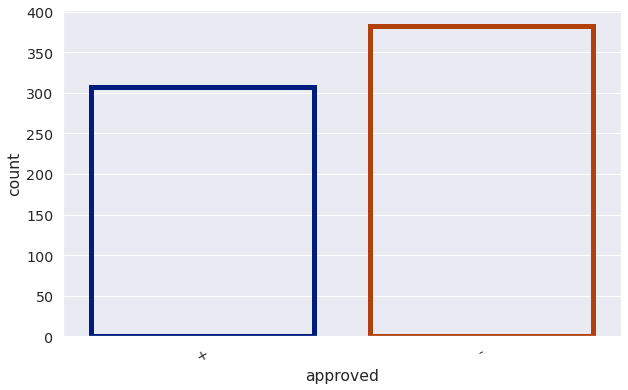

In [27]:
CPlot('approved')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
The number of <b> Non-Approved '-' </b> CC is higher than <b> Approved '+' </b> cc   
<br></p>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  driver_license   690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approved         690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Numerical Features </b></p>
</div>. 

- **Age**
- **dept**
- **years_employed**
- **credit_score**
- **income**

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Age   </b></p>
</div>

In [29]:
df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,690.0,31.514116,11.860245,13.75,22.67,28.46,37.7075,80.25


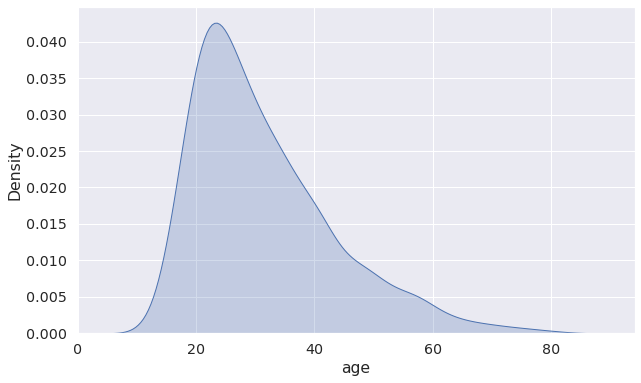

In [30]:
KPlot('age')

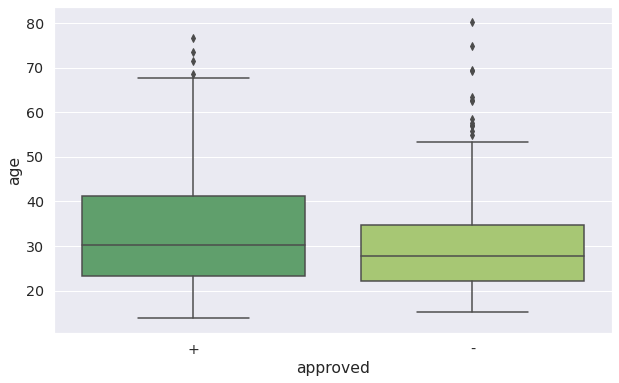

In [31]:
Box('age',None)

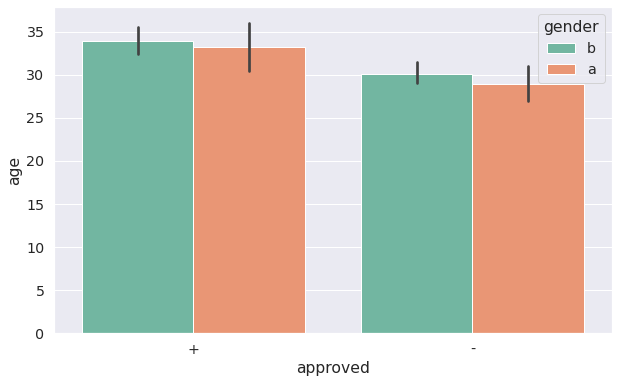

In [32]:
Bar('age','gender')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>It is clear that here the avarage age of cc approved is higher than non approved and also there is a difference in range between two categories </b><br>
    <br></p>

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> debt   </b></p>
</div>

In [33]:
df[['debt']].describe().T

,count,mean,std,min,25%,50%,75%,max
debt,690.0,4.758725,4.978163,0.0,1.0,2.75,7.2075,28.0


(None, None, None)

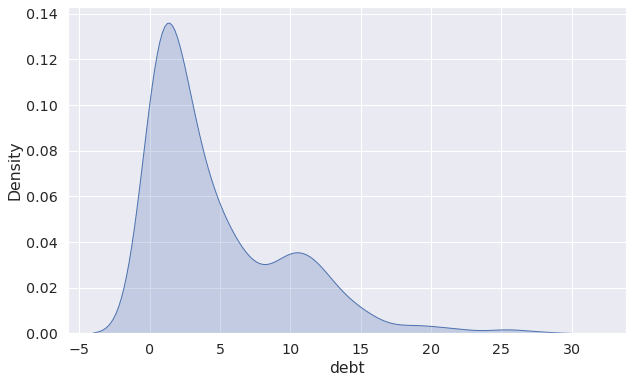

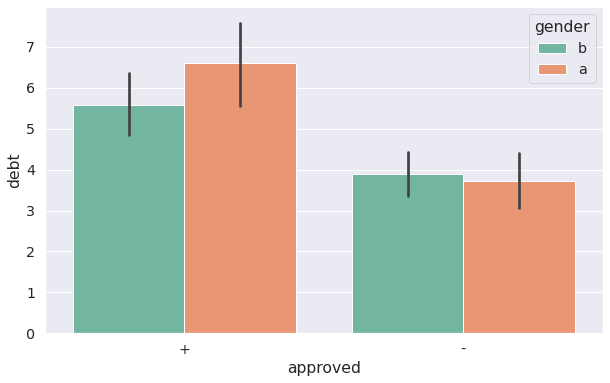

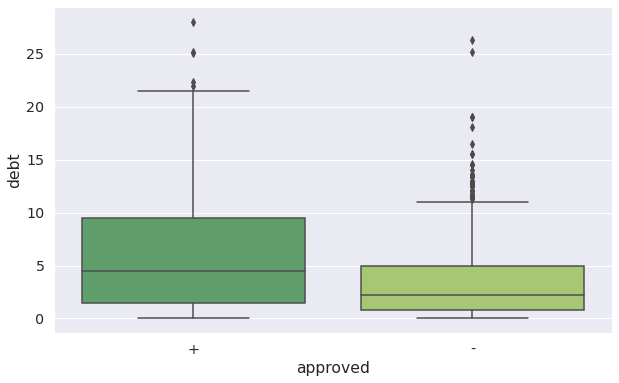

In [34]:
KPlot('debt'),Bar('debt','gender'),Box('debt',None)

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> years_employed   </b></p>
</div>

In [35]:
df[['years_employed']].describe().T

,count,mean,std,min,25%,50%,75%,max
years_employed,690.0,2.223406,3.346513,0.0,0.165,1.0,2.625,28.5


(None, None, None)

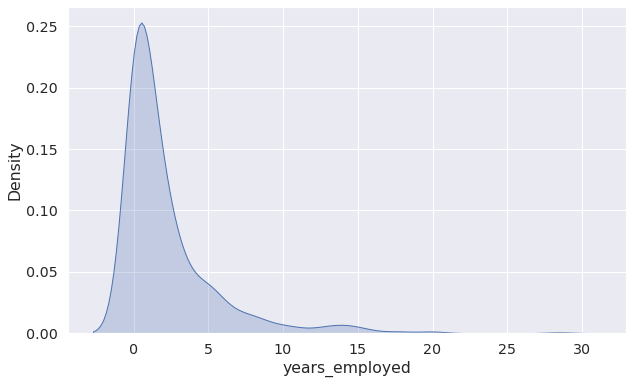

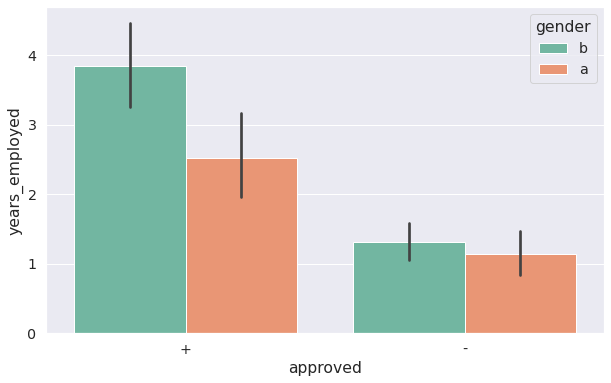

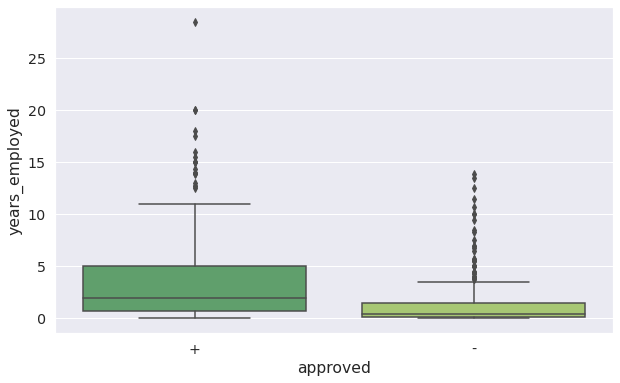

In [36]:
KPlot('years_employed'),Bar('years_employed','gender'),Box('years_employed',None)

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> credit_score </b></p>
</div>

In [37]:
df[['credit_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,690.0,2.4,4.86294,0.0,0.0,0.0,3.0,67.0


(None, None, None)

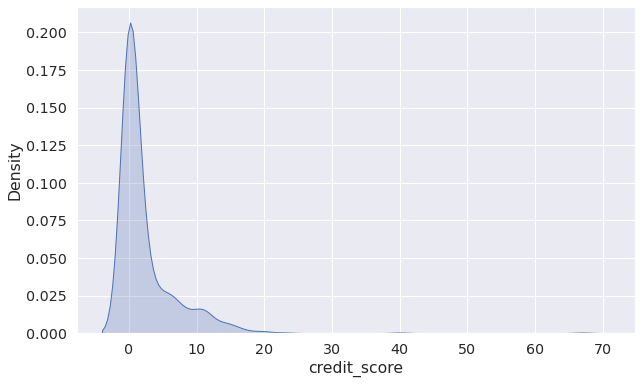

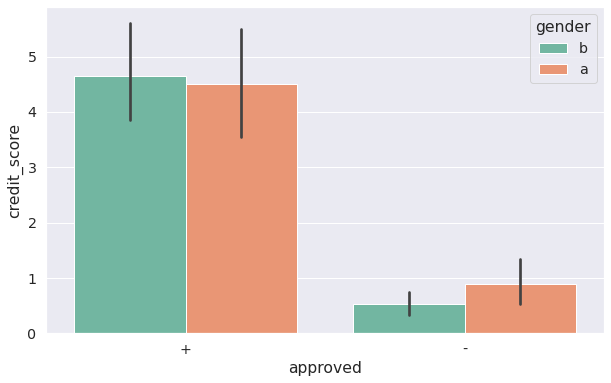

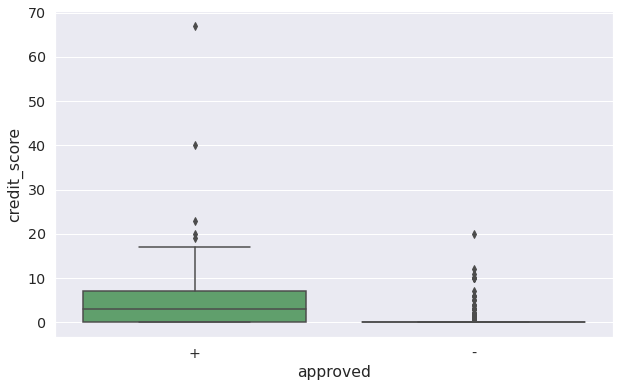

In [38]:
KPlot('credit_score'),Bar('credit_score','gender'),Box('credit_score',None)

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> income   </b></p>
</div>

In [39]:
df[['income']].describe().T

,count,mean,std,min,25%,50%,75%,max
income,690.0,1017.385507,5210.102598,0.0,0.0,5.0,395.5,100000.0


(None, None)

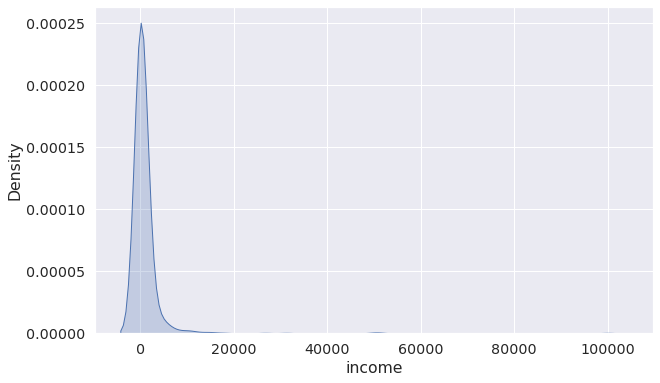

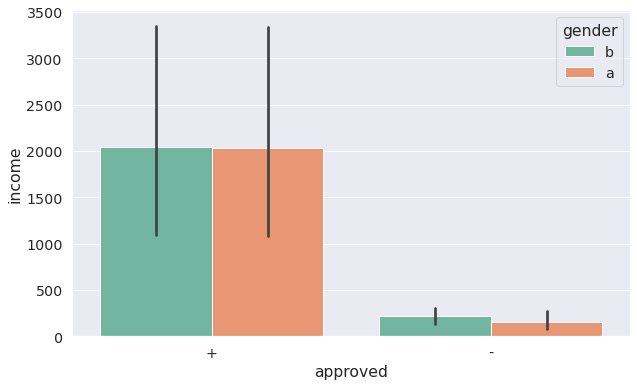

In [40]:
KPlot('income'),Bar('income','gender')

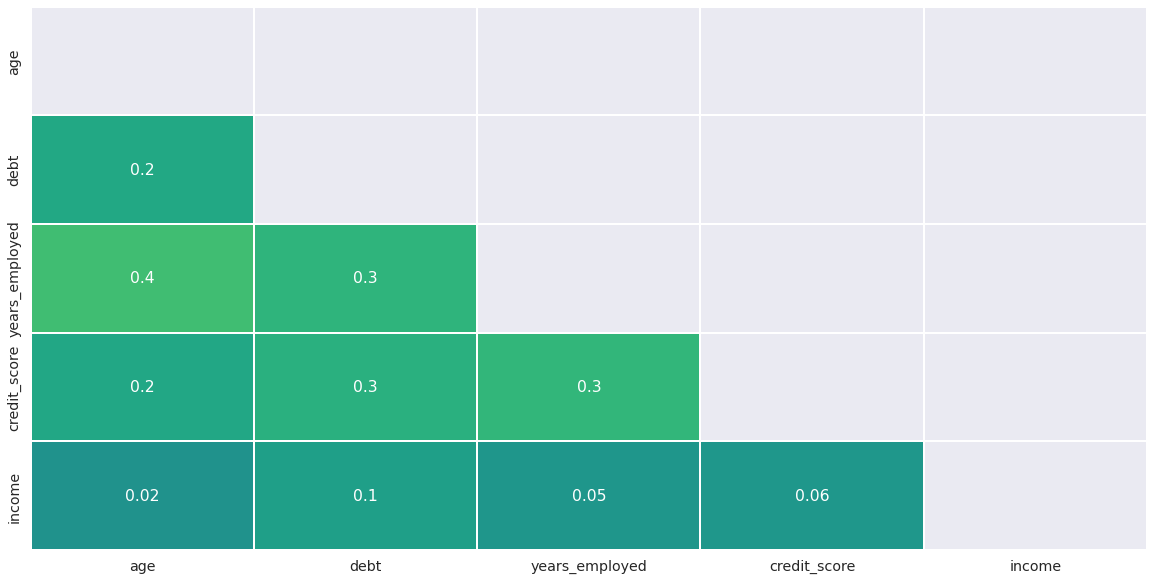

In [41]:
corrMat(df)

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.3 | Categorical Features </b></p>
</div>. 

In [42]:
cat_col=['gender','married', 'bank_customer', 'education_level',
       'ethnicity','prior_default', 'employed','driver_license', 'citizen', 'zip_code']

In [43]:
def categorical(col):
    global df
    print(f'Col_name : {col}')
    print(df[col].value_counts())
    print(df.groupby(col)['approved'].value_counts())
    sns.countplot(x = df[col], hue = 'approved', data = df, palette = 'YlOrBr')
    Pie(col)
    plt.show()

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> gender   </b></p>
</div>

Col_name : gender
b    480
a    210
Name: gender, dtype: int64
gender  approved
a       -           112
        +            98
b       -           271
        +           209
Name: approved, dtype: int64


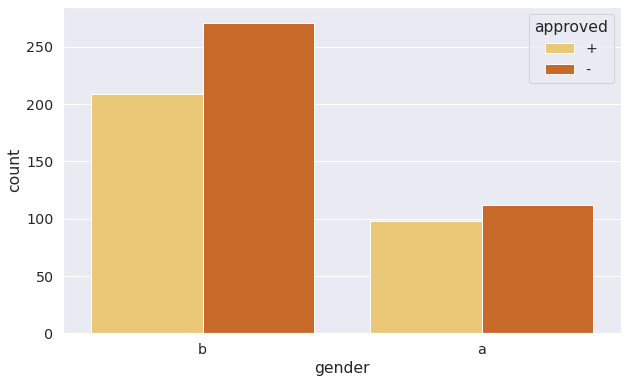

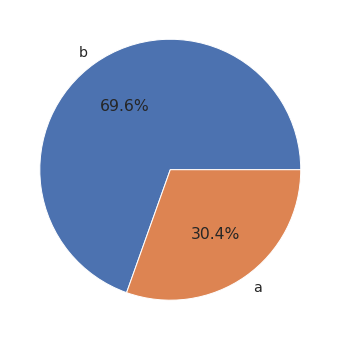

In [44]:
categorical('gender')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> married   </b></p>
</div>

Col_name : married
u    525
y    163
l      2
Name: married, dtype: int64
married  approved
l        +             2
u        -           265
         +           260
y        -           118
         +            45
Name: approved, dtype: int64


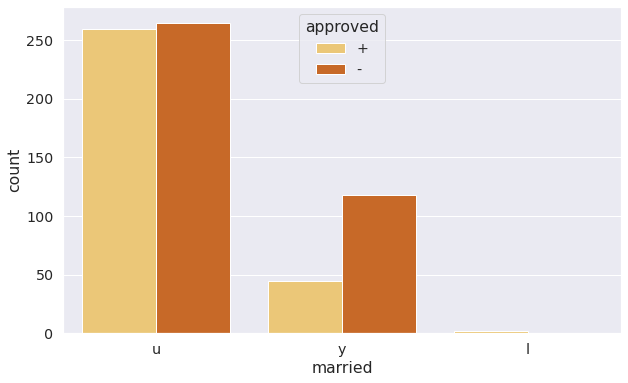

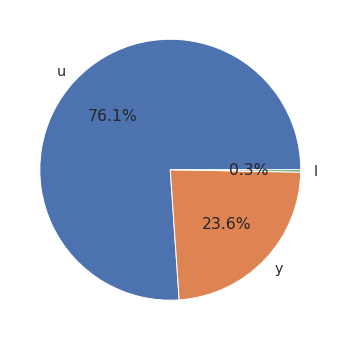

In [45]:
categorical('married')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> bank_customer   </b></p>
</div>

Col_name : bank_customer
g     525
p     163
gg      2
Name: bank_customer, dtype: int64
bank_customer  approved
g              -           265
               +           260
gg             +             2
p              -           118
               +            45
Name: approved, dtype: int64


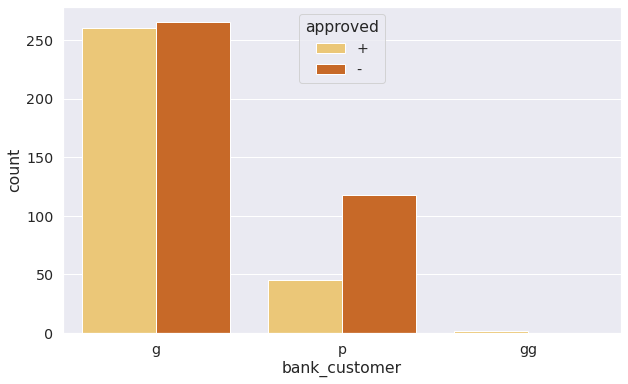

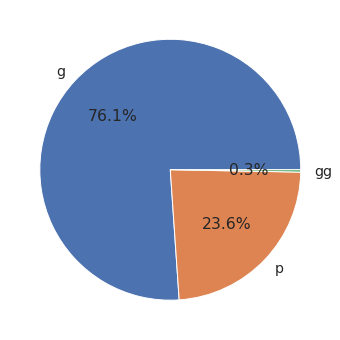

In [46]:
categorical('bank_customer')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> ethnicity   </b></p>
</div>

Col_name : ethnicity
v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: ethnicity, dtype: int64
ethnicity  approved
bb         -            34
           +            25
dd         -             4
           +             2
ff         -            49
           +             8
h          +            87
           -            51
j          -             5
           +             3
n          +             2
           -             2
o          +             1
           -             1
v          -           235
           +           173
z          +             6
           -             2
Name: approved, dtype: int64


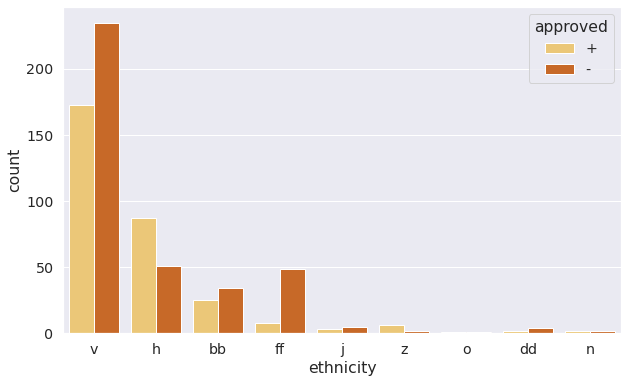

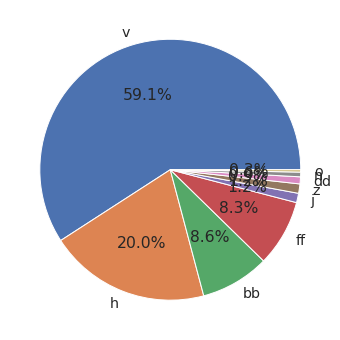

In [47]:
categorical('ethnicity')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> prior_default   </b></p>
</div>

Col_name : prior_default
t    361
f    329
Name: prior_default, dtype: int64
prior_default  approved
f              -           306
               +            23
t              +           284
               -            77
Name: approved, dtype: int64


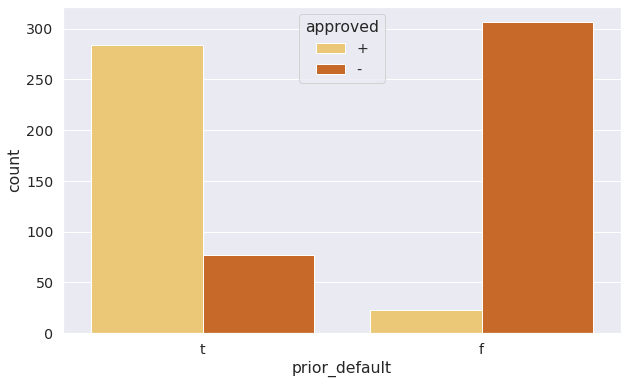

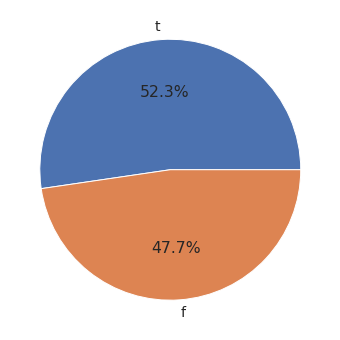

In [48]:
categorical('prior_default')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> employed   </b></p>
</div>

Col_name : employed
f    395
t    295
Name: employed, dtype: int64
employed  approved
f         -           297
          +            98
t         +           209
          -            86
Name: approved, dtype: int64


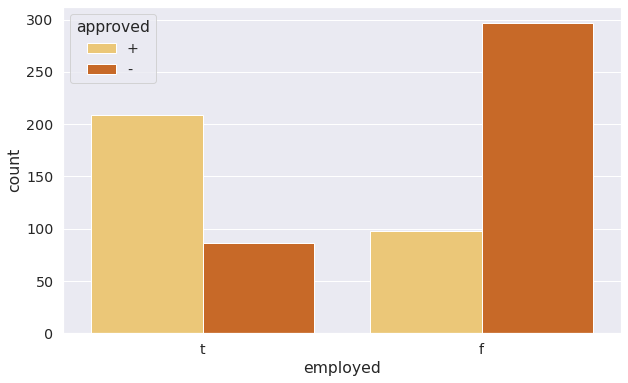

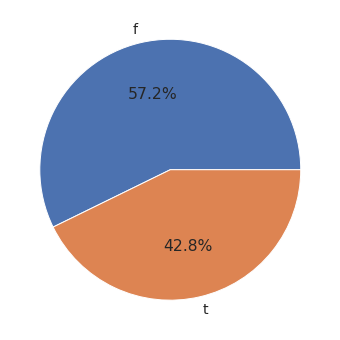

In [49]:
categorical('employed')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> driver_license   </b></p>
</div>

Col_name : driver_license
f    374
t    316
Name: driver_license, dtype: int64
driver_license  approved
f               -           213
                +           161
t               -           170
                +           146
Name: approved, dtype: int64


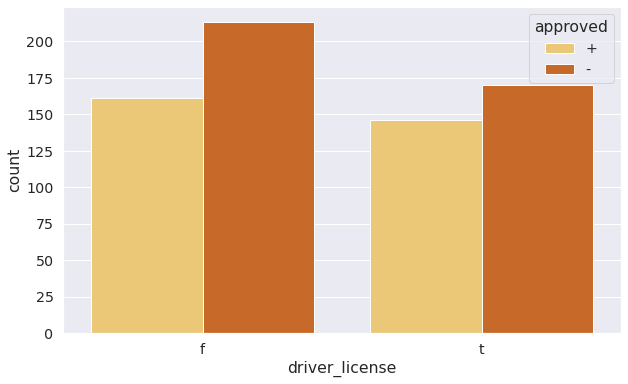

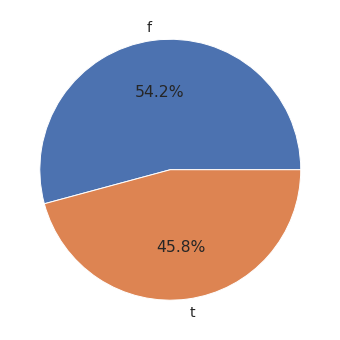

In [50]:
categorical('driver_license')

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> citizen   </b></p>
</div>

Col_name : citizen
g    625
s     57
p      8
Name: citizen, dtype: int64
citizen  approved
g        -           338
         +           287
p        +             5
         -             3
s        -            42
         +            15
Name: approved, dtype: int64


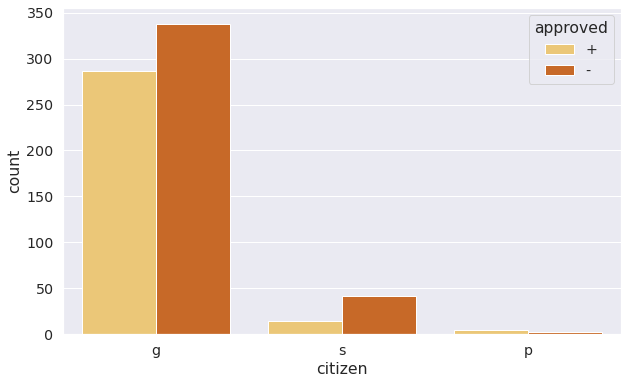

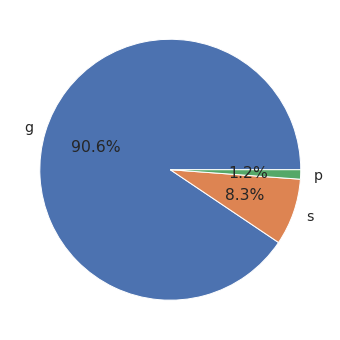

In [51]:
categorical('citizen')

# <b>6<span style='color:#0000FF'>|</span> Data Preprocessing</b>

In [52]:
df.head()

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,driver_license,citizen,zip_code,income,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [53]:
## drop zip code column 
df.drop(columns=['zip_code'],inplace=True,axis=1)

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Encoding  </b></p>
</div>. 

In [54]:
encoder=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=encoder.fit_transform(df[col])

In [55]:
## As we can see all features are of numeric type now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    int64  
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          690 non-null    int64  
 4   bank_customer    690 non-null    int64  
 5   education_level  690 non-null    int64  
 6   ethnicity        690 non-null    int64  
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    int64  
 9   employed         690 non-null    int64  
 10  credit_score     690 non-null    int64  
 11  driver_license   690 non-null    int64  
 12  citizen          690 non-null    int64  
 13  income           690 non-null    int64  
 14  approved         690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


# <b>7<span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [56]:
df.columns

Index(['gender', 'age', 'debt', 'married', 'bank_customer', 'education_level',
       'ethnicity', 'years_employed', 'prior_default', 'employed',
       'credit_score', 'driver_license', 'citizen', 'income', 'approved'],
      dtype='object')

In [57]:
features = df.drop(columns =['approved'], axis = 1)
target = df['approved']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .15, random_state = 44)

In [59]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (586, 14)
Shape of testing feature: (104, 14)
Shape of training label: (586,)
Shape of training label: (104,)


# <b>8<span style='color:#0000FF'>|</span> Standrization </b>

In [60]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [61]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [62]:
x_train

array([[-1.46071552,  1.06944901,  0.37400229, ...,  1.09681699,
        -0.31055901, -0.19119335],
       [-1.46071552,  1.22413456, -0.15924672, ..., -0.91172913,
        -0.31055901, -0.0185801 ],
       [ 0.684596  ,  0.27996098, -0.15924672, ...,  1.09681699,
        -0.31055901, -0.19119335],
       ...,
       [ 0.684596  , -0.88905609, -0.35934016, ...,  1.09681699,
        -0.31055901, -0.19101355],
       [-1.46071552,  1.54787537,  1.75864888, ...,  1.09681699,
        -0.31055901, -0.19119335],
       [-1.46071552, -0.41739194, -0.45138314, ...,  1.09681699,
        -0.31055901, -0.18040503]])

# <b>9 <span style='color:#0000FF'>|</span> Modeling </b>

In [63]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [64]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*50)

Training Model LR 
--------------
Training Accuracy: 0.863481228668942
Testing Accuracy: 0.875
Testing Confusion Matrix: 
[[39  2]
 [11 52]]
Testing Recall: 0.8253968253968254
Testing Precesion: 0.9629629629629629
Testing F-1: 0.8888888888888888
Testing F-Beta: 0.931899641577061
--------------------------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8873720136518771
Testing Accuracy: 0.8557692307692307
Testing Confusion Matrix: 
[[33  8]
 [ 7 56]]
Testing Recall: 0.8888888888888888
Testing Precesion: 0.875
Testing F-1: 0.8818897637795274
Testing F-Beta: 0.877742946708464
--------------------------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.7980769230769231
Testing Confusion Matrix: 
[[31 10]
 [11 52]]
Testing Recall: 0.8253968253968254
Testing Precesion: 0.8387096774193549
Testing F-1: 0.832
Testing F-Beta: 0.8360128617363344
--------------------------------------------------
Training Model RF 

In [65]:
def evaluate_model(model,x):
    model=model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print('_'*50)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('_'*50)
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('_'*50)
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('_'*50)
    print(classification_report(y_test,y_pred))
    print('_'*50)
    print('F1 Score: ',f1_score(y_test,y_pred))
    
    # Display confussion matrix
    plt.figure(figsize = (6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,cmap=x, fmt = '.1f') # plot_kwargs = {'percent' : True}
    plt.xlabel('Predicted')
    plt.ylabel('True')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Random Forest  </b></p>
</div>. 

Training Accuracy: 0.984641638225256
__________________________________________________
Accuracy Score:  0.9038461538461539
__________________________________________________
Precision Score:  0.9344262295081968
__________________________________________________
Recall Score:  0.9047619047619048
__________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.93      0.90      0.92        63

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104

__________________________________________________
F1 Score:  0.9193548387096775


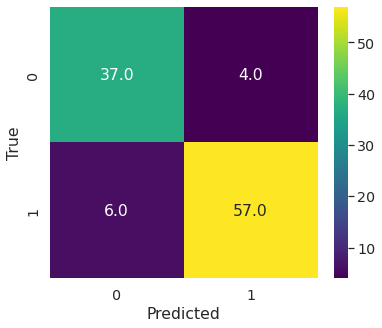

In [66]:
evaluate_model(RandomForestClassifier(criterion='entropy', max_depth=10,n_estimators=20, random_state=0),'viridis')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Random Forest | Cross_Validation   </b></p>
</div>. 

In [67]:
from sklearn.model_selection import cross_validate
model=RandomForestClassifier()
c_val = cross_validate(model, x_train, y_train, cv = 10 , scoring = ('accuracy', 'recall', 'precision'))

In [68]:
c_val

{'fit_time': array([0.17782331, 0.17629099, 0.17408323, 0.17780089, 0.17682743,
        0.19063568, 0.19956446, 0.20331144, 0.18087912, 0.18875313]),
 'score_time': array([0.01436353, 0.01400924, 0.01396799, 0.01338935, 0.01450109,
        0.01506925, 0.01477146, 0.01528049, 0.01571798, 0.01467705]),
 'test_accuracy': array([0.86440678, 0.91525424, 0.84745763, 0.86440678, 0.88135593,
        0.84745763, 0.87931034, 0.79310345, 0.9137931 , 0.86206897]),
 'test_recall': array([0.875  , 0.90625, 0.8125 , 0.875  , 0.90625, 0.90625, 0.9375 ,
        0.84375, 0.90625, 0.8125 ]),
 'test_precision': array([0.875     , 0.93548387, 0.89655172, 0.875     , 0.87878788,
        0.82857143, 0.85714286, 0.79411765, 0.93548387, 0.92857143])}

In [69]:
c_val['test_accuracy'].mean() *100

86.68614845119814

In [70]:
c_val['test_recall'].mean() *100

87.8125

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Hyperparameters tuning  </b></p>
</div>. 

In [71]:
from sklearn.model_selection import cross_validate, GridSearchCV

model = RandomForestClassifier()

param = {'max_depth': [5,10, 20],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],'n_estimators': [10,20,25,30]}

grid_search = GridSearchCV(estimator = model, param_grid=param, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 25, 30]})

In [72]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [73]:
grid_search.predict(x_test)
print(f'Training Accuracy: {grid_search.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 0.9965870307167235
Testing Accuracy: 0.7788461538461539


Training Accuracy: 0.9232081911262798
__________________________________________________
Accuracy Score:  0.8557692307692307
__________________________________________________
Precision Score:  0.8870967741935484
__________________________________________________
Recall Score:  0.873015873015873
__________________________________________________
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.89      0.87      0.88        63

    accuracy                           0.86       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.86      0.86       104

__________________________________________________
F1 Score:  0.88


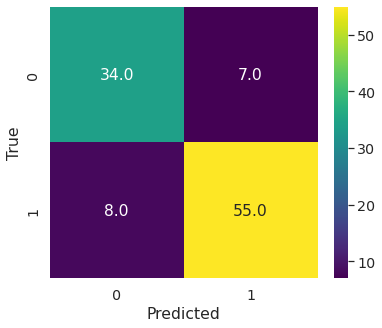

In [74]:
evaluate_model(RandomForestClassifier(max_depth= 10,max_features= 'sqrt',min_samples_leaf=4,
                                      min_samples_split= 5,n_estimators=20),'viridis')